# Task 3: Relationship between total return of users and their Mifid scores

Files that we're going to use to solve problem
* AccountInvestorSurvey.xlsx (to get mfid scores)
* InvestorAccountHistory.xlsx (to get total return)


## Part 1: Understand the Problem

Our objective is to see relationship between mfid score and total return of account.
What is mfid score? 
* Mfid score is profile of investor, we have 11 different profile from 0 to 10
*  0 means less risk, less volatility, less return
*  10 means more risk, more volatility, more return

### Type of the problem

* We clearly see that to solve this problem we will use supervised learning, linear regression is one of the solution that first comes our mind which consists of predicting a continuous value, for example predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete

**We will try to use mfid scores to predict investors total return in this section**

List of approaches we will use to solve problem:
* We will create a basic linear regression model
* We will use multiple regression, because other features in our data might be affective to predict return pct of investors

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Prepare the Data

In [3]:
# Let's fetch our dataframe first

# This is the list of data that we only interest
list = ["AccountId", "Mifid", "ReturnPct"]
df = pd.read_excel("./Project/data/AccountsInvestorSurvey.xlsx", index_col="AccountId", usecols=list)
df

,Mifid,ReturnPct
AccountId,,
1,7.23125,27.476871
3,5.51250,27.333140
4,9.21875,19.178523
5,7.50000,27.170163
7,7.44375,26.574040
...,...,...
7136,3.00000,0.000000
7138,7.12500,0.000000
7139,10.00000,0.000000


In [4]:
# Is there any null values?
df.isnull().sum()

Mifid        2
ReturnPct    2
dtype: int64

In [5]:
# Delete last two row
df.drop(df.tail(2).index,inplace=True) # drop last n rows

In [6]:
# Our dataFrame is ready.
df.head()

,Mifid,ReturnPct
AccountId,,
1,7.23125,27.476871
3,5.51250,27.333140
4,9.21875,19.178523
5,7.50000,27.170163
7,7.44375,26.574040


In [7]:
# How many account has zero return percentage?
df.loc[df["ReturnPct"] == 0]

,Mifid,ReturnPct
AccountId,,
368,8.12500,0.0
524,5.56875,0.0
6031,3.00000,0.0
6045,9.06250,0.0
7122,7.28125,0.0
7131,9.53125,0.0
7136,3.00000,0.0
7138,7.12500,0.0
7139,10.00000,0.0


In [8]:
# Drop accounts who has 0 return value
# We drop these accounts because they got into system with initial fund but they never use the system, they just had 0 return pct
# they have no affect on data, so delete them
df.drop(df[df["ReturnPct"] == 0].index, inplace=True)

In [9]:
# Basic statistic on data
df.describe()

,Mifid,ReturnPct
count,625.000000,625.000000
mean,7.008265,1379.755707
std,1.720624,32403.874834
min,2.021875,-148481.343386
25%,6.343750,1.653879
50%,7.387500,6.221038
75%,8.281250,9.579935
max,10.000000,621851.421352


### Correlation between mifid and returnpct

What is correlation?

Put in plain terms, correlation is a measure of how strongly one variable depends on another. It can be positive or negative.
For example salaries and experience year and salariest might be have strong positive correlation. Most of the good regression models take it's power from good correlate values

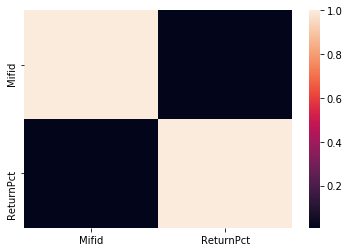

In [10]:
# Let's take a look at correlation between Mifid score and return values
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

* Seems like corelation between mifid and returnpct  is really bad. Unfortunately this a bad sign to create a good model because, powerful models take their advantage from good correlated features.

###  Data Visualization

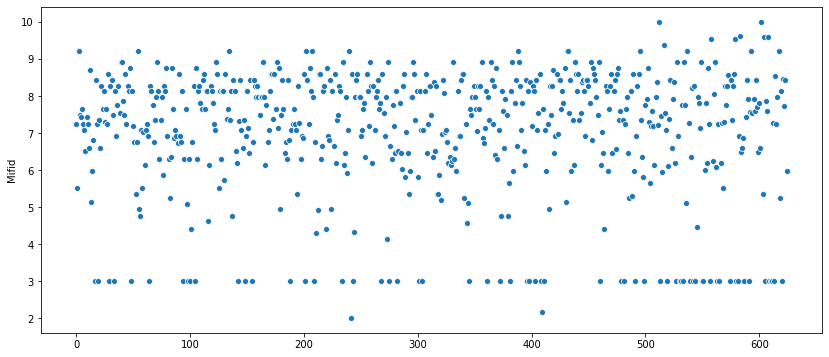

In [11]:
# Let's see the mifid scores on scatter plot
# Plots are helping to us better understading data
plt.figure(figsize=(14,6))
sns.scatterplot(data=df["Mifid"].values)
plt.ylabel("Mifid")
plt.show()


Text(0, 0.5, 'Return %')

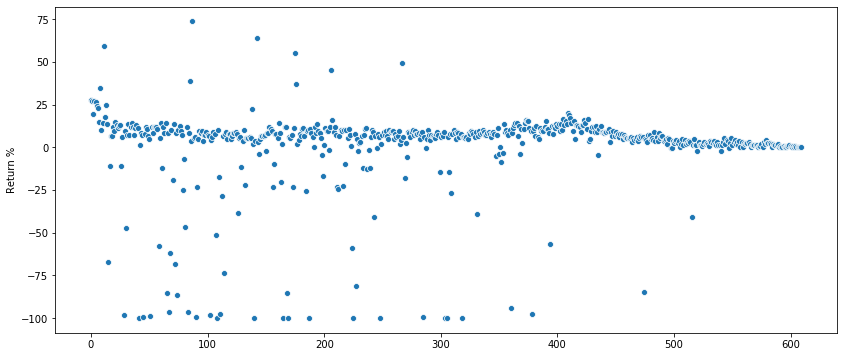

In [12]:
# Let's plot return percentages
plt.figure(figsize=(14,6))
sns.scatterplot(data=df[(df["ReturnPct"] < 100) & (df["ReturnPct"] > -100)]["ReturnPct"].values)
plt.ylabel("Return %")

Analysis: Most of our investors has percentage between %0 and %25, in the previous task we've calculated investor's performance against inflation and the rate was %77~, with all these observations we can assume that system is profitable for investors

## Part 2: Simple linear regression

* In this section we will create a simple linear regression model to predict return percentage according to mifid score for each account.

In [13]:
# Since we will use linear regression, we separate our data into dependent(y) and independent(x) variables
x = df.iloc[:, :-1].values # Mifid
y = df.iloc[:, -1].values # ReturnPct

In [14]:
x.shape

(625, 1)

In [15]:
y.shape

(625,)

### Splitting our data into x_train, x_test, y_train, y_test

In [16]:
# In order to achieve this, we will use train_test_split function from sklearn.
from sklearn.model_selection import train_test_split

# This function returns 4 different np array
# %20 for test, %80 for train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(500, 1)
(500,)
(125, 1)
(125,)


In [18]:
# Create our model, we will import linear regression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)

### Train the model

In [19]:
# We're using default values to fit model
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [20]:
model.score(x_test,y_test)

-4648.0155684937

Our model is performing really bad because correlation between features are also bad...

We will use another approach such as multiple regression.

**Why our model is doing so bad at score?**

Like we mentioned before, bad correlated features cause low success models. 

### Predicting the test results

In [21]:
y_pred = model.predict(x_test)

In [22]:
# To see actual and predicted values we're creating a new dataframe
performance = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
performance

,Actual,Predicted
0,3.223034,1548.641687
1,14.638303,1844.227938
2,12.758796,1879.720471
3,2.051181,1851.991930
4,8.644310,1602.435057
...,...,...
120,5.059354,1768.806306
121,5.192780,2010.599187
122,-68.587728,1713.349223
123,7.296547,1899.685021


## Visualising the Training set results

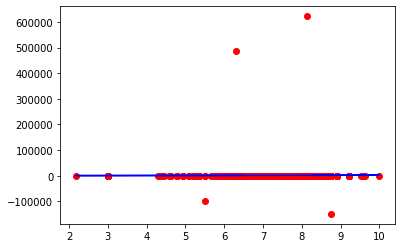

In [23]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.show()

### Two metrics MSE and RMSE are mostly used to measure error rate in linear regressions

In [24]:
from sklearn import metrics   
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Squared Error (MSE): 3150223.3539863476
Root Mean Squared Error (RMSE): 1774.8868566718127


Our error rates are so high... 
We need to use another regression technich.

## Part 3: Multiple Linear Regression

Unlike simple linear regression, Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

* In this section we will prepare our data and we will look correlation between our features. Our goal is to find good corralated features with "Return Percentage" because at the end as a dependent variable we need  try to predict "Return Percentage"

### Prepare the data


In [25]:
df = pd.read_excel("./Project/data/AccountsInvestorSurvey.xlsx", index_col="AccountId")
df

,QuestionnaireDate,AnnualIncome,AnnualSavings,Wealth,Horizon,Objective,InvestmentRisk,PotentialLoss,Mifid,CurrentBalance,Currency,DateFunded,ReturnPct,YearOfBirth
AccountId,,,,,,,,,,,,,,
1,2016-09-25,40000.0,30000.0,35000.0,10.0,3.0,2.0,10.0,7.23125,6851.244231,1.0,2016-01-07,27.476871,1982.0
3,2016-09-25,100000.0,0.0,2400000.0,5.0,0.0,3.0,10.0,5.51250,873447.239897,1.0,2015-12-15,27.333140,1960.0
4,2019-03-25,100000.0,70000.0,600000.0,15.0,3.0,4.0,20.0,9.21875,22102.397117,1.0,2016-02-19,19.178523,1984.0
5,2018-11-14,40000.0,10000.0,150000.0,10.0,3.0,3.0,20.0,7.50000,16824.579561,1.0,2016-02-22,27.170163,1975.0
7,2017-09-27,45000.0,30000.0,87500.0,15.0,3.0,3.0,5.0,7.44375,22355.787118,1.0,2016-01-22,26.574040,1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7136,2019-10-29,50000.0,15000.0,30000.0,15.0,1.0,3.0,30.0,3.00000,10000.000000,1.0,2019-10-30,0.000000,1974.0
7138,2019-10-30,40000.0,5000.0,11000.0,10.0,3.0,4.0,15.0,7.12500,5000.000000,1.0,2019-10-31,0.000000,1973.0
7139,2019-10-30,80000.0,60000.0,425000.0,25.0,3.0,5.0,30.0,10.00000,5000.000000,1.0,2019-10-31,0.000000,1982.0


In [26]:
# Delete last two row, null values
df.drop(df.tail(2).index, inplace=True)

### Improving the correlation performance

* In our data, there are lot of investor account that has current balance less than 500, It means we can ignore return percentage of those investors because they were closed. 
* Also, we have bunch of investors who got into system with initial fund but they never gained such return percantage from system, so we will drop that investors data from our dataframe
* We will look at outliers, outliers can help detect the data that doesn't fit our data too much, but if they amount is too much we can't just drop them break the integrity of data
- These improvements will help to increase our correlation between return pct and features

In [27]:
# If account is closed (i.e. has < 500 EUR current balance) ignore the return.

# Closed accounts
df[df["CurrentBalance"]<500]

,QuestionnaireDate,AnnualIncome,AnnualSavings,Wealth,Horizon,Objective,InvestmentRisk,PotentialLoss,Mifid,CurrentBalance,Currency,DateFunded,ReturnPct,YearOfBirth
AccountId,,,,,,,,,,,,,,
12,2016-10-10,100000.0,30000.0,150000.0,15.0,3.0,2.0,10.0,7.07500,-6.237840e-04,2.0,2016-07-13,-100.000346,1969.0
32,2017-01-02,50000.0,15000.0,150000.0,10.0,1.0,3.0,20.0,3.00000,4.273354e+00,1.0,2017-03-20,-66.983463,1980.0
33,2017-01-07,50000.0,10000.0,150000.0,15.0,3.0,4.0,20.0,8.43750,-2.046100e-03,1.0,2017-04-19,-11.147673,1976.0
36,2017-01-19,30000.0,10000.0,87500.0,15.0,3.0,2.0,10.0,7.23125,-1.780623e-03,1.0,2017-05-09,6.402331,1965.0
49,2017-02-27,15000.0,7800.0,35000.0,15.0,3.0,3.0,20.0,8.28125,-1.470000e-07,1.0,2017-04-04,-100.000052,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2019-06-22,60000.0,22000.0,40000.0,5.0,1.0,3.0,5.0,3.00000,1.171288e+00,1.0,2019-06-27,-40.972878,1978.0
3934,2019-06-28,35000.0,15000.0,35000.0,20.0,3.0,4.0,20.0,8.90625,3.340578e-03,1.0,2019-07-01,1.371284,1985.0
5964,2019-07-21,65000.0,35000.0,250000.0,10.0,3.0,5.0,25.0,8.75000,3.000000e+00,1.0,2019-07-22,-2.498300,1978.0


In [28]:
# Let's ignore their return percentage
df.drop(df[df["CurrentBalance"]<500].index, inplace=True)

In [29]:
# Accounts that got into system but never gained any return percentage
df[df["ReturnPct"]==0]

,QuestionnaireDate,AnnualIncome,AnnualSavings,Wealth,Horizon,Objective,InvestmentRisk,PotentialLoss,Mifid,CurrentBalance,Currency,DateFunded,ReturnPct,YearOfBirth
AccountId,,,,,,,,,,,,,,
6045,2019-09-17,40000.0,10000.0,70000.0,20.0,3.0,5.0,25.0,9.06250,1222.90344,1.0,2019-11-01,0.0,1980.0
7122,2019-10-25,28000.0,14000.0,50000.0,10.0,3.0,3.0,15.0,7.28125,5000.00000,1.0,2019-10-25,0.0,1968.0
7131,2019-10-29,33000.0,12000.0,30000.0,12.0,3.0,5.0,30.0,9.53125,1000.00000,1.0,2019-10-30,0.0,1992.0
7136,2019-10-29,50000.0,15000.0,30000.0,15.0,1.0,3.0,30.0,3.00000,10000.00000,1.0,2019-10-30,0.0,1974.0
7138,2019-10-30,40000.0,5000.0,11000.0,10.0,3.0,4.0,15.0,7.12500,5000.00000,1.0,2019-10-31,0.0,1973.0
7139,2019-10-30,80000.0,60000.0,425000.0,25.0,3.0,5.0,30.0,10.00000,5000.00000,1.0,2019-10-31,0.0,1982.0


In [30]:
# Ignore them too just as we did in previous model
df.drop(df[df["ReturnPct"]==0].index,inplace=True)

In [31]:
# Final dataFrame
df

,QuestionnaireDate,AnnualIncome,AnnualSavings,Wealth,Horizon,Objective,InvestmentRisk,PotentialLoss,Mifid,CurrentBalance,Currency,DateFunded,ReturnPct,YearOfBirth
AccountId,,,,,,,,,,,,,,
1,2016-09-25,40000.0,30000.0,35000.0,10.0,3.0,2.0,10.0,7.23125,6851.244231,1.0,2016-01-07,27.476871,1982.0
3,2016-09-25,100000.0,0.0,2400000.0,5.0,0.0,3.0,10.0,5.51250,873447.239897,1.0,2015-12-15,27.333140,1960.0
4,2019-03-25,100000.0,70000.0,600000.0,15.0,3.0,4.0,20.0,9.21875,22102.397117,1.0,2016-02-19,19.178523,1984.0
5,2018-11-14,40000.0,10000.0,150000.0,10.0,3.0,3.0,20.0,7.50000,16824.579561,1.0,2016-02-22,27.170163,1975.0
7,2017-09-27,45000.0,30000.0,87500.0,15.0,3.0,3.0,5.0,7.44375,22355.787118,1.0,2016-01-22,26.574040,1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7118,2019-10-23,80000.0,24000.0,50000.0,3.0,1.0,1.0,7.0,3.00000,9991.192321,1.0,2019-10-23,-0.088077,1984.0
7119,2019-10-24,49000.0,17000.0,60000.0,10.0,3.0,5.0,25.0,8.46250,9996.859217,1.0,2019-10-25,-0.031408,1964.0
7120,2019-10-24,18000.0,10000.0,90000.0,14.0,3.0,3.0,16.0,7.71875,4999.910000,1.0,2019-10-31,-0.001800,1973.0


### Analysing Outliers

In this section we will try to find outlier data and to make our correlation better we might drop them from dataframe.
But if outlier data amount is too much, we won't do that because it will affect our regression model too much

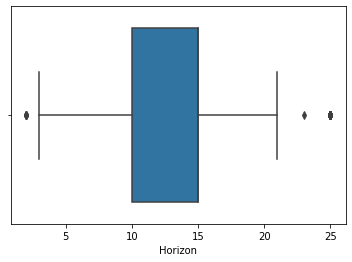

In [32]:
# Boxplot for every feature

sns.boxplot(x=df['Horizon']);

In [33]:
dfh = df['Horizon']
dfh_Q1 = dfh.quantile(0.25)
dfh_Q3 = dfh.quantile(0.75)
dfh_IQR = dfh_Q3 - dfh_Q1
dfh_lowerend = dfh_Q1 - (1.5 * dfh_IQR)
dfh_upperend = dfh_Q3 + (1.5 * dfh_IQR)

In [34]:
dfh_outliers = dfh[(dfh < dfh) | (dfh > dfh_upperend)]
dfh_outliers.shape

(97,)

97 outlier sample is too much for us, we can't drop all of them it will cause faults on data.

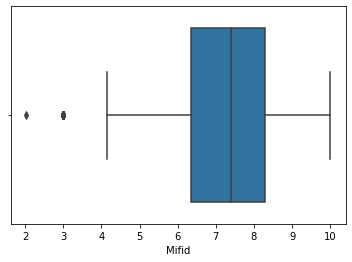

In [35]:
sns.boxplot(x=df['Mifid']);

In [36]:
dfmif = df['Mifid']
dfmif_Q1 = dfmif.quantile(0.25)
dfmif_Q3 = dfmif.quantile(0.75)
dfmif_IQR = dfmif_Q3 - dfmif_Q1
dfmif_lowerend = dfmif_Q1 - (1.5 * dfmif_IQR)
dfmif_upperend = dfmif_Q3 + (1.5 * dfmif_IQR)

dfmif_outliers = dfmif[(dfmif < dfmif_lowerend) | (dfmif > dfmif_upperend)]
dfmif_outliers.shape

(52,)

52 sample is again too much to drop

In this example we won't go further more, because it's obvious that outlier data is too much and we don't want to break integrity of data so that we can't drop them from data

### Correlation heat map

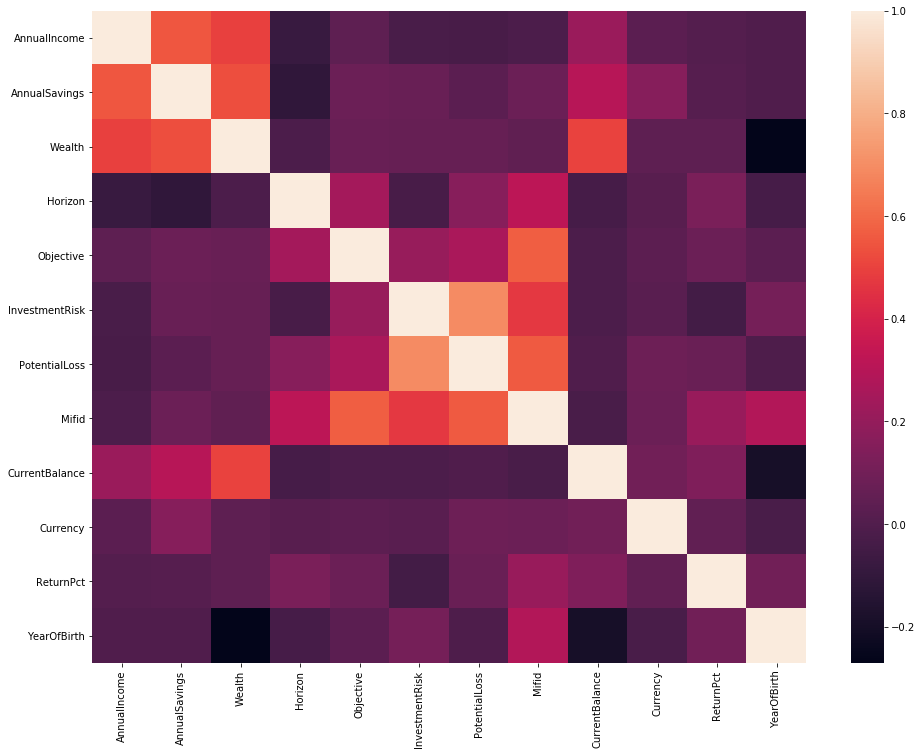

In [37]:
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Analysis

* When we turn back and look up the previous correlation between ReturnPct and Mifid Score in the previous linear regression model, we clearly see that the modification we've done on data has helped to improve our correlation scores
- Previous correlation between mifid and return pct was around 0.10 ~
- Thanks to modifications current correlation between mifid and return pct is around 0.30 ~

Which features should we select to create a multiple regression?

Return percentage has better correlation with Horizon, Mifid, and CurrentBalance. And also these features have good correlation with each other.

### Prepare the data

In [39]:
df = df[["Horizon","Mifid","CurrentBalance","ReturnPct"]]

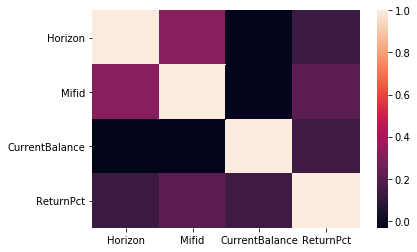

In [41]:
# To see correlation between selected features

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Current model has better correlation values between features than the previous simple linear regression model

In [44]:
# Final dataframe for multiple regression
df

,Horizon,Mifid,CurrentBalance,ReturnPct
AccountId,,,,
1,10.0,7.23125,6851.244231,27.476871
3,5.0,5.51250,873447.239897,27.333140
4,15.0,9.21875,22102.397117,19.178523
5,10.0,7.50000,16824.579561,27.170163
7,15.0,7.44375,22355.787118,26.574040
...,...,...,...,...
7118,3.0,3.00000,9991.192321,-0.088077
7119,10.0,8.46250,9996.859217,-0.031408
7120,14.0,7.71875,4999.910000,-0.001800


In [45]:
# Basic statistic of data
df.describe()

,Horizon,Mifid,CurrentBalance,ReturnPct
count,497.000000,497.000000,497.000000,497.000000
mean,13.676056,7.010029,26391.051800,7.763128
std,6.789289,1.716242,59342.240433,7.457386
min,2.000000,2.021875,3040.211394,-9.565821
25%,10.000000,6.343750,6943.380562,4.057153
50%,15.000000,7.387500,11847.338175,7.237166
75%,15.000000,8.281250,21816.793048,9.882405
max,25.000000,10.000000,873447.239897,123.294595


### Data Visualization

**Since we work on regression problem, let's see regression plot between  features**

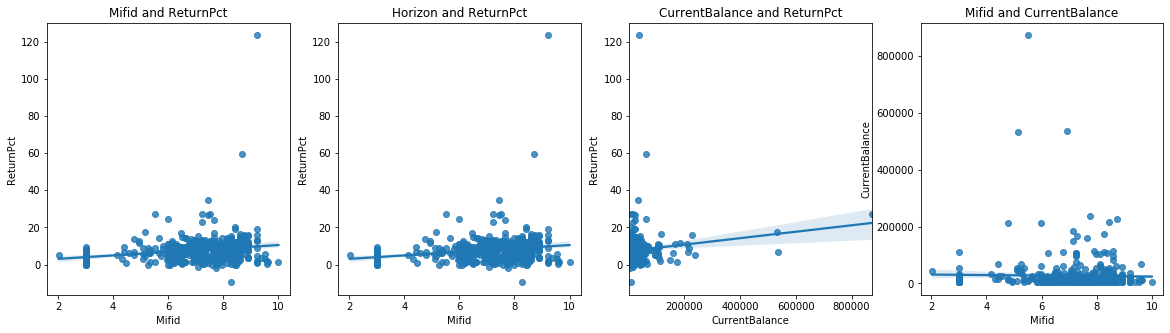

In [46]:
## regression line between mifid score and return pct
plt.figure(figsize=(20,5))
plt.subplot(1,4,1,)
plt.title('Mifid and ReturnPct')
plt.xlabel('Mifid')
plt.ylabel('ReturnPct')
sns.regplot(data=df, x="Mifid",y="ReturnPct");

## regression line between Horizon score and return pct
plt.subplot(1,4,2,)
plt.title('Horizon and ReturnPct')
plt.xlabel('Horizon')
plt.ylabel('ReturnPct')
sns.regplot(data=df, x="Mifid",y="ReturnPct");

## regression line between Current Balance score and return pct
plt.subplot(1,4,3,)
plt.title('CurrentBalance and ReturnPct')
plt.xlabel('CurrentBalance')
plt.ylabel('ReturnPct')
sns.regplot(data=df, x="CurrentBalance",y="ReturnPct");

## regression line between mifid score and current balance
plt.subplot(1,4,4,)
plt.title('Mifid and CurrentBalance')
plt.xlabel('Mifid')
plt.ylabel('Horizon')
sns.regplot(data=df, x="Mifid",y="CurrentBalance");


* Mifid-ReturnPct and Horizon-ReturnPct has better regression line

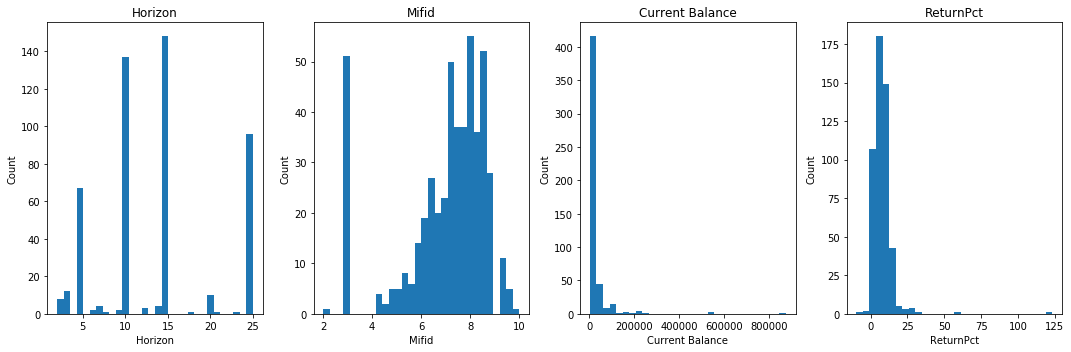

In [47]:
# Histogram of features

plt.figure(figsize=(15,5))
plt.subplot(1,4,1,)
plt.title('Horizon')
plt.xlabel('Horizon')
plt.ylabel('Count')
plt.hist(df.Horizon,bins=30)

plt.subplot(1,4,2)
plt.title('Mifid')
plt.xlabel('Mifid')
plt.ylabel('Count')
plt.hist(df['Mifid'],bins=30)

plt.subplot(1,4,3)
plt.title('Current Balance')
plt.xlabel('Current Balance')
plt.ylabel('Count')
plt.hist(df['CurrentBalance'],bins=30)

plt.subplot(1,4,4)
plt.title('ReturnPct')
plt.xlabel('ReturnPct')
plt.ylabel('Count')
plt.hist(df['ReturnPct'],bins=30)

plt.tight_layout()


#### Analysis

* Most of investors have mifid score between 6-8.5~ it means that investors are tend to take more risk(0 less risk, 10 more risk)
* Vast majority of investors have 10000~ € Current Balance
* When we look at Return Percentages(the profit they've gained) most of it has scaled between 0 and 25 

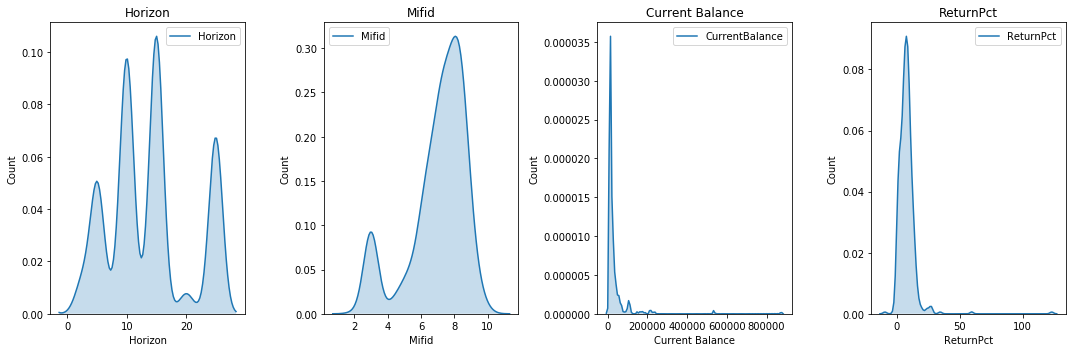

In [48]:
# Density of features

plt.figure(figsize=(15,5))
plt.subplot(1,4,1,)
plt.title('Horizon')
plt.xlabel('Horizon')
plt.ylabel('Count')
sns.kdeplot(data=df.Horizon, shade=True)

plt.subplot(1,4,2)
plt.title('Mifid')
plt.xlabel('Mifid')
plt.ylabel('Count')
sns.kdeplot(data=df.Mifid, shade=True)

plt.subplot(1,4,3)
plt.title('Current Balance')
plt.xlabel('Current Balance')
plt.ylabel('Count')
sns.kdeplot(data=df.CurrentBalance, shade=True)

plt.subplot(1,4,4)
plt.title('ReturnPct')
plt.xlabel('ReturnPct')
plt.ylabel('Count')
sns.kdeplot(data=df.ReturnPct, shade=True)

plt.tight_layout()

* We can see similiar observations as we saw in histogram of data

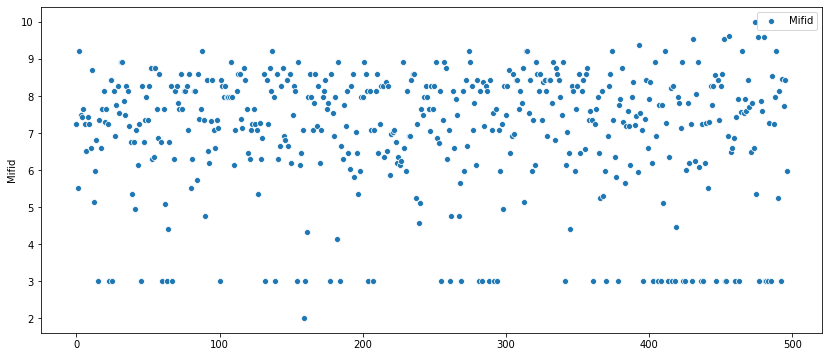

In [98]:
# Let's plot return percentage and mifid scores again because we've cleared the dataframe a little bit
plt.figure(figsize=(14,6))
sns.scatterplot(data=df["Mifid"].values,label="Mifid")
plt.ylabel("Mifid")
plt.show()

* Also we can see that on scatter plot too, vast majority of investors mifid score scaled between 6-8.5~

Text(0, 0.5, 'Percentages')

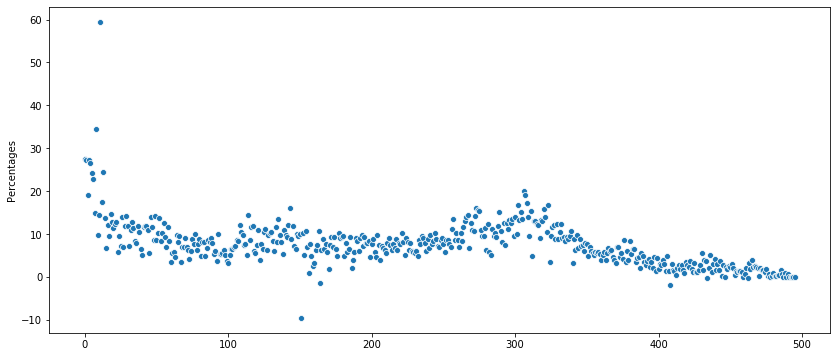

In [49]:
# Let's plot return percentages
plt.figure(figsize=(14,6))
sns.scatterplot(data=df[(df["ReturnPct"] < 100) & (df["ReturnPct"] > -100)]["ReturnPct"].values)
plt.ylabel("Percentages")

### Preparing the Model

In this section we will seperate our data into dependant and independant variables, after we will split our data into train and test

As a regression model, we will be using linear regression model from sklearn library

We will anaylze prediction score with previous simple linear model and we will visualize prediction of model

In [50]:
# Independant variables Horizon, Mifid, Current Balance
X = df.iloc[:,[0,1,2]].values
# Dependant(Target) Return Pct
y = df.iloc[:,-1].values

**I. Split data into train, test**

In [51]:
from sklearn.model_selection import train_test_split as tts
# Test size = %20
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2, random_state=1)

In [52]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (397, 3)
y_train:  (397,)
X_test:  (100, 3)
y_test:  (100,)


**II. Sklearn Library Linear Regression Model**

In [53]:
from sklearn.linear_model import LinearRegression
# To measure success of model later
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**III. Predictions by using model**

In [54]:
y_pred = model.predict(X_test)

In [55]:
# Create a new dataframe to see actual return pct and predicted return pct
model_prediction = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
model_prediction

,Actual,Predicted
0,9.703131,6.128772
1,7.109737,8.725038
2,-0.001800,7.941639
3,3.542185,7.416972
4,5.908348,9.265654
...,...,...
95,0.187074,3.509602
96,3.736888,6.989494
97,7.835526,8.244520
98,6.400912,8.999624


* Our model is doing pretty bad job at predicting negative return percentages

In [56]:
model.score(X_test,y_test)

0.09434943147910102

Compare with previous simple linear regression score with -4600~, new model is doing way better than previous

**IV. Visualization of predictions**

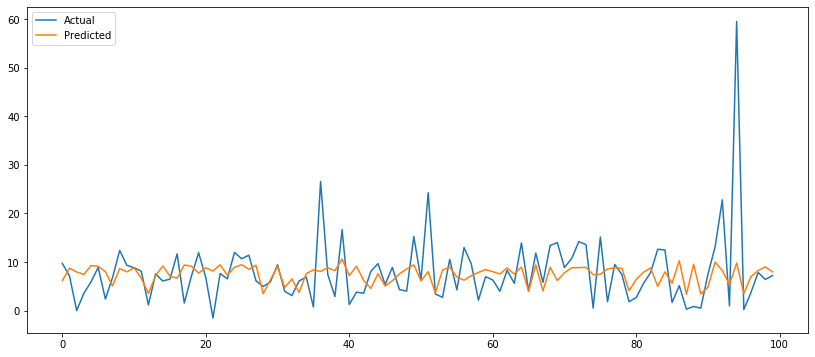

In [57]:
plt.figure(figsize=(14,6))
sns.lineplot(data=model_prediction.Actual.values,label = "Actual")
sns.lineplot(data=model_prediction.Predicted.values, label= "Predicted")

## Result:

We've developed a two different model with supervised learning, we've used linear regression model in both example

Here is our observations:
* In first simple linear regression, correlation between dependant and independant variable were so bad therefore we got model with very low score.

To improve this score and performance our model, we decided to use another perspective which was multiple linear regression.

* Our main goal was to increase correlation between features and return percentage
* We've analyzed data to detect closed accounts first because they had no influence on data and they just were decreasing correlation, so that we deleted them
* We also deleted the accounts with zero return percentage, they got into system with their initial value but they never gain any return percentage from system, so that we deleted them to improve correlation
* Secondary, we checked if is there any outliers data, due to huge amount of outliers we couldn't just delete them because our data could be affected by lack of data
* Compared to our previous model, we achieved a good increase in our correlation values thanks to the manipulations we made on the data, and this was reflected in the success of our model
* Although the success of our new model is not too high, it is obvious that it has made a great improvement compared to the previous model (from -4460 to 0.098 ~)
* Thanks to observation that we've gained from plots, we had the opportunity to better understand the data